In [10]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

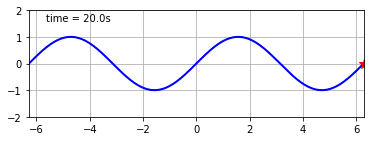

In [13]:
# create data
c = 0.1 * 2*np.pi


def wave(x, t):
    y = np.sin(x - c*t)
    return y


t_min = 0
t_max = 20
dt = 0.05
t = np.arange(t_min, t_max + dt, dt)

x_min = -2*np.pi
x_max = 2*np.pi
dx = 0.05
x = np.arange(x_min, x_max + dx, dx)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(x_min, x_max), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

ax.plot(x, wave(x, t_min), '-.b', lw=1)

line, = ax.plot([], [], '-b', lw=2)
point, = ax.plot([], [], '*r', markersize=10)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    point.set_data([], [])
    time_text.set_text('')
    return line, point, time_text


def animate(i):
    lx = x
    ly = wave(x, i*dt)

    px = c*i*dt / 2
    py = wave(px, i*dt)

    line.set_data(lx, ly)
    point.set_data(px, py)
    time_text.set_text(time_template % (i*dt))
    return line, point, time_text


ani = FuncAnimation(fig, animate, np.arange(0, len(t)),
                              interval=25, blit=True, init_func=init)

HTML(ani.to_jshtml())